<a href="https://colab.research.google.com/github/AlfonsoCastilloFlores/IB_IA_AD2024_1970709/blob/main/AF4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

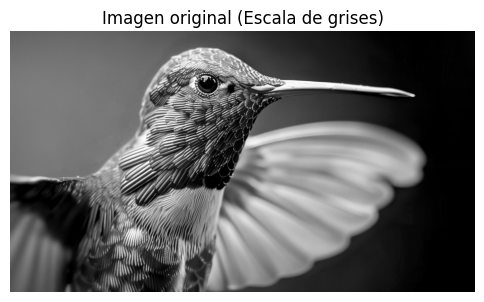

In [2]:
# Cargar imagen en escala de grises
img = cv2.imread('/content/colibri.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar carga
assert img is not None, "No se pudo cargar la imagen. Verifica que esté en /content/colibri.jpg"

# Mostrar imagen original
plt.figure(figsize=(6,6))
plt.title('Imagen original (Escala de grises)')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


### 🔹 Carga y visualización de la imagen

Se carga una imagen en escala de grises desde la ruta `/content/colibri.jpg` utilizando `cv2.imread()` con la bandera `cv2.IMREAD_GRAYSCALE`. Esto convierte la imagen a un solo canal, ideal para trabajar con transformadas de Fourier y simplificar el análisis.

Se visualiza con `matplotlib.pyplot.imshow()` usando la paleta de grises (`cmap='gray'`), eliminando los ejes para una presentación limpia.


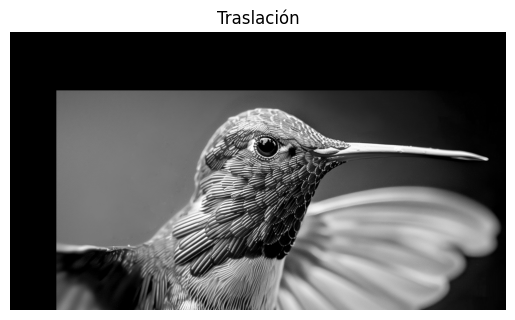

In [5]:
# Definir matriz de traslación (500px a la derecha, 630px hacia abajo)
rows, cols = img.shape
M_trans = np.float32([[1, 0, 500], [0, 1, 630]])
img_trans = cv2.warpAffine(img, M_trans, (cols, rows))

plt.imshow(img_trans, cmap='gray')
plt.title('Traslación')
plt.axis('off')
plt.show()


### 🔹 Traslación

Se utiliza la función `cv2.warpAffine()` junto con una matriz de transformación que desplaza la imagen 500 píxeles a la derecha y 630 hacia abajo. Esta operación mantiene la forma original de la imagen pero cambia su ubicación en el lienzo.


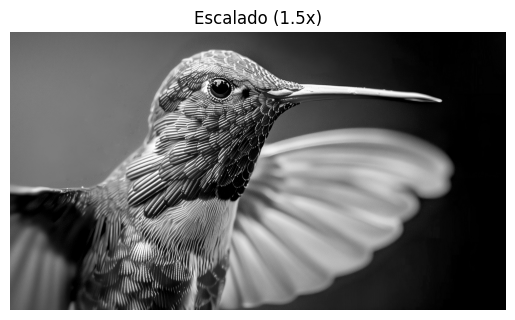

In [3]:
img_scaled = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)

plt.imshow(img_scaled, cmap='gray')
plt.title('Escalado (1.5x)')
plt.axis('off')
plt.show()


### 🔹 Escalado

Mediante la función `cv2.resize()` se aumenta el tamaño de la imagen en 1.5 veces en ambos ejes (horizontal y vertical). Esto permite visualizar la imagen con mayor detalle, aunque también puede introducir interpolación.


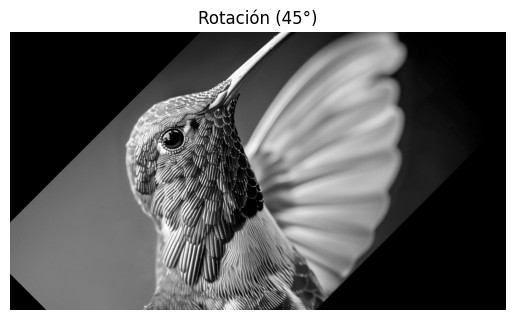

In [6]:
center = (cols // 2, rows // 2)
M_rot = cv2.getRotationMatrix2D(center, 45, 1.0)
img_rotated = cv2.warpAffine(img, M_rot, (cols, rows))

plt.imshow(img_rotated, cmap='gray')
plt.title('Rotación (45°)')
plt.axis('off')
plt.show()


### 🔹 Rotación

Se rota la imagen 45 grados utilizando `cv2.getRotationMatrix2D()` para construir la matriz de rotación, y luego `cv2.warpAffine()` para aplicar la transformación. Como no se cambia el tamaño del lienzo, pueden aparecer áreas negras donde no hay información.


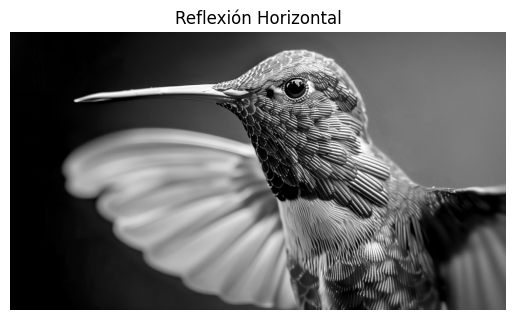

In [7]:
img_flipped = cv2.flip(img, 1)  # Eje vertical

plt.imshow(img_flipped, cmap='gray')
plt.title('Reflexión Horizontal')
plt.axis('off')
plt.show()


### 🔹 Reflexión

La imagen se invierte horizontalmente utilizando `cv2.flip(img, 1)`. Esta transformación simula un efecto espejo respecto al eje vertical.


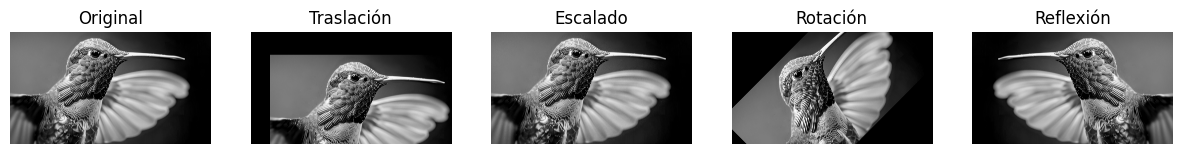

In [8]:
titles = ['Original', 'Traslación', 'Escalado', 'Rotación', 'Reflexión']
images = [img, img_trans, img_scaled, img_rotated, img_flipped]

plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()


Comentarios:

La traslación mueve la imagen dentro del lienzo sin alterar su forma.

El escalado agranda o reduce el tamaño de la imagen.

La rotación puede generar áreas negras si se mantiene el tamaño original.

La reflexión crea un espejo de la imagen.

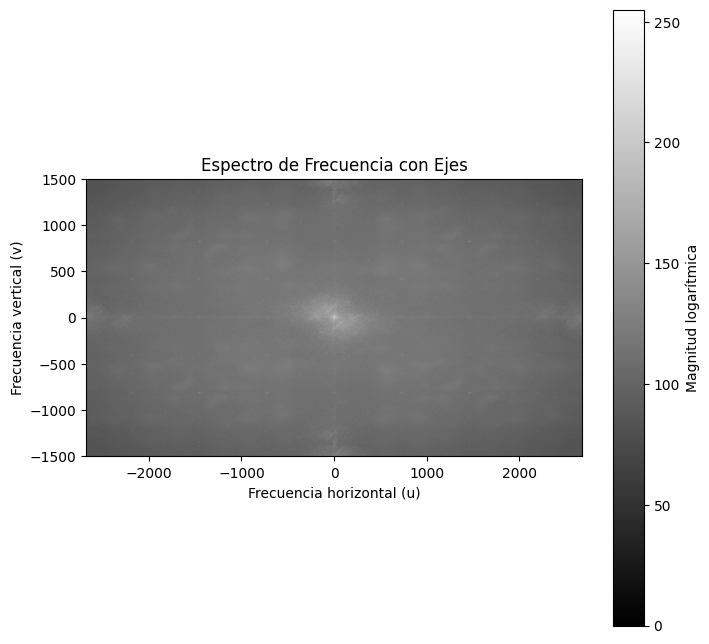

In [13]:
# Recalcular DFT por claridad
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude = cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])
spectrum_log = np.log1p(magnitude)

# Normalización
spectrum_norm = cv2.normalize(spectrum_log, None, 0, 255, cv2.NORM_MINMAX)

# Mostrar con ejes
plt.figure(figsize=(8, 8))
plt.imshow(spectrum_norm, cmap='gray', extent=(-cols//2, cols//2, -rows//2, rows//2))
plt.title('Espectro de Frecuencia con Ejes')
plt.xlabel('Frecuencia horizontal (u)')
plt.ylabel('Frecuencia vertical (v)')
plt.colorbar(label='Magnitud logarítmica')
plt.grid(False)
plt.show()


### 🔹 Transformada de Fourier (DFT)

Se aplica la DFT (Transformada Discreta de Fourier) con `cv2.dft()` y se reorganizan las frecuencias usando `np.fft.fftshift()` para colocar las bajas frecuencias en el centro de la imagen.

Se calcula la magnitud del espectro con `cv2.magnitude()` y se aplica un logaritmo (`np.log1p`) para mejorar la visualización. Finalmente, se normaliza para que los valores estén en el rango [0, 255], permitiendo una representación visual clara del espectro de frecuencias.

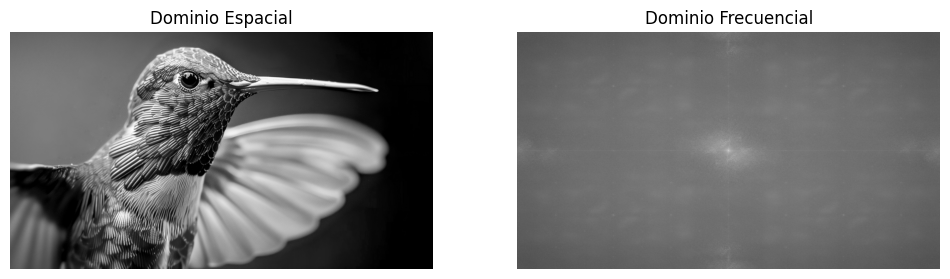

In [10]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Dominio Espacial')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(spectrum, cmap='gray')
plt.title('Dominio Frecuencial')
plt.axis('off')

plt.show()


### 🔹 Visualización del espectro con ejes

Se visualiza el espectro de frecuencias con ejes numéricos utilizando el parámetro `extent` de `imshow()`. Esto permite interpretar los valores de frecuencia espacial tanto positiva como negativa en los ejes horizontal (u) y vertical (v).

El centro de la imagen representa las bajas frecuencias (estructura general), mientras que los bordes contienen las altas frecuencias (bordes, texturas y ruido).


Análisis del espectro
Centro: contiene las bajas frecuencias (estructura general).

Bordes: altas frecuencias (bordes y ruido).

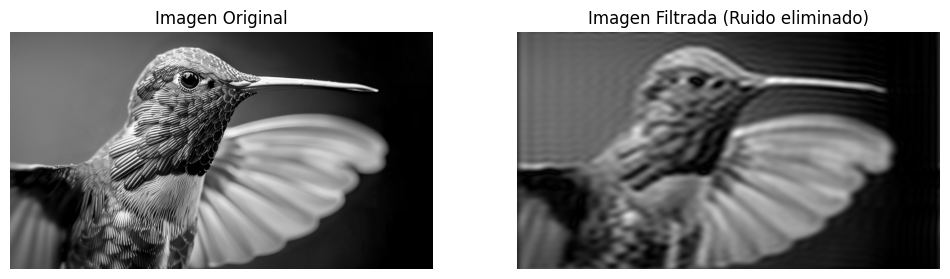

In [11]:
# Crear máscara de paso bajo
mask = np.zeros_like(dft_shift)
crow, ccol = rows//2, cols//2
r = 30  # radio del filtro

mask[crow-r:crow+r, ccol-r:ccol+r] = 1

# Aplicar máscara
fshift = dft_shift * mask

# Inversa DFT
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

# Visualizar
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_back, cmap='gray')
plt.title('Imagen Filtrada (Ruido eliminado)')
plt.axis('off')

plt.show()


### 🔹 Filtro de Paso Bajo (Eliminación de Ruido)

Se crea una máscara circular centrada que deja pasar solo las bajas frecuencias, bloqueando las altas (ruido y detalles finos). Se multiplica la DFT desplazada por esta máscara y se aplica la transformada inversa (`cv2.idft`) para volver al dominio espacial.

Como resultado, se obtiene una imagen suavizada, con menor nivel de ruido y menos detalles finos, demostrando cómo se puede filtrar una imagen manipulando su contenido frecuencial.
